In [78]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,make_scorer,confusion_matrix
from sklearn.feature_selection import RFECV
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
data=pd.read_csv('E:/Ramya/brushUps/Basics/ML using sklearn/Projects/Wine_quality/data/winequality-red.csv',delimiter=';')
X=data.iloc[:,0:11]
y=data.iloc[:,11]

In [79]:
col_names=X.columns
scaler=preprocessing.MinMaxScaler()
normalized_list=scaler.fit_transform(X)
X=pd.DataFrame(normalized_list,columns=col_names)

In [80]:
y=pd.cut(y,bins=3,labels=['poor','normal','excellent'])
from sklearn.preprocessing import LabelEncoder
label_map={'poor':0,'normal':1,'excellent':2}
y=y.map(label_map)
y=np.array(y)

In [81]:
f1=make_scorer(f1_score,average='weighted')

In [82]:
logreg=LogisticRegression(solver='newton-cg',C=10,multi_class='auto',penalty='l2')

In [83]:
selector=RFECV(estimator=logreg,step=1,cv=10,scoring=f1)
selector.fit(X,y)

RFECV(cv=10, estimator=LogisticRegression(C=10, solver='newton-cg'),
      scoring=make_scorer(f1_score, average=weighted))

In [84]:
selector.n_features_

11

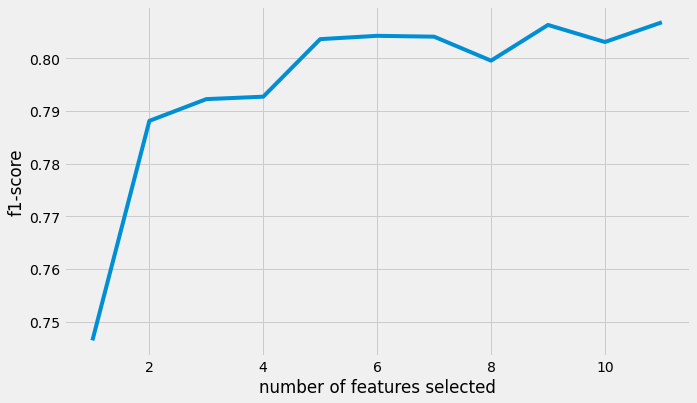

In [85]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
plt.xlabel('number of features selected')
plt.ylabel('f1-score')
plt.plot(range(1,len(selector.grid_scores_)+1),selector.grid_scores_)
plt.show()

In [86]:
#features that are considered most important
selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [87]:
selector.grid_scores_

array([0.74646296, 0.78815073, 0.792277  , 0.79274042, 0.80366933,
       0.804298  , 0.80413674, 0.79958394, 0.80636398, 0.80312511,
       0.8068686 ])

In [88]:
avg_coeffs=np.average(selector.estimator_.coef_,axis=0)

In [89]:
min_val=min(avg_coeffs)
max_val=max(avg_coeffs)
avg_coeffs=(avg_coeffs-min_val)/(max_val-min_val)

In [90]:
avg_coeffs

array([0.84732824, 1.        , 0.59618321, 0.70381679, 0.75877863,
       0.75801527, 0.67328244, 0.        , 0.81679389, 0.38931298,
       0.12977099])

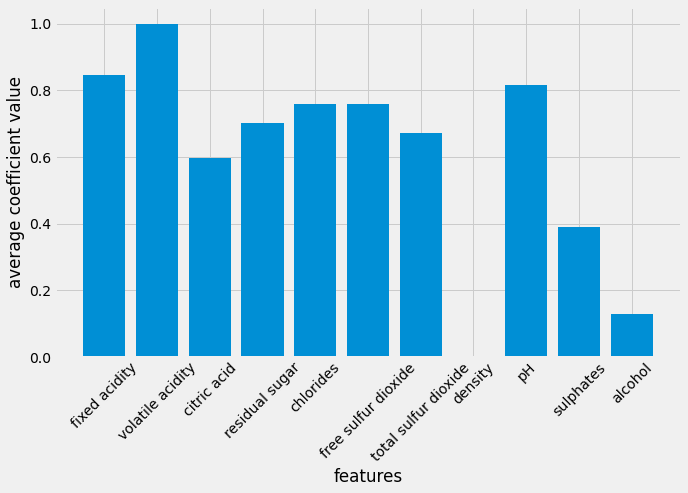

In [91]:
plt.figure(figsize=(10,6))
plt.bar(col_names,avg_coeffs)
plt.xlabel('features')
plt.ylabel('average coefficient value')
plt.xticks(rotation=45)
plt.show()

In [92]:
first_set_important=avg_coeffs>0.8
second_set_important=avg_coeffs>avg_coeffs.mean()

In [93]:
first_set_important_features=[]
second_set_important_features=[]
for i in range(len(first_set_important)):
    if first_set_important[i]==True:
        first_set_important_features.append(col_names[i])
for i in range(len(second_set_important)):
    if second_set_important[i]==True:
        second_set_important_features.append(col_names[i])

In [94]:
first_set_important_features

['fixed acidity', 'volatile acidity', 'pH']

In [95]:
second_set_important_features

['fixed acidity',
 'volatile acidity',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'pH']

In [96]:
#second important set of features (number=8)

In [97]:
X=X.loc[:,second_set_important_features]

In [98]:
f1=make_scorer(f1_score,average='weighted')
grid_params={
    'kernel':['linear','poly','rbf'],
    'C':[0.1,1,10,100,1000],
    'gamma':[0.0001,0.001,0.01,0.1,1],
    }
svmclf=GridSearchCV(SVC(),param_grid=grid_params,cv=10,return_train_score=False,scoring=f1)
svmclf.fit(X,y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring=make_scorer(f1_score, average=weighted))

In [100]:
svmclf.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [101]:
clf=SVC(C=svmclf.best_params_['C'],gamma=svmclf.best_params_['gamma'],kernel=svmclf.best_params_['kernel'])

In [102]:
y_pred=cross_val_predict(clf,X,y,cv=10)
print('f1_score: '+str(round(f1_score(y,y_pred,average='weighted'),4)))

f1_score: 0.7589


In [103]:
cm=pd.DataFrame(confusion_matrix(y,y_pred),columns=['predicted_poor','predicted_normal','predicted_excellent'],index=['true_poor','true_normal','true_excellent'])
cm

,predicted_poor,predicted_normal,predicted_excellent
true_poor,1,60,2
true_normal,12,1275,32
true_excellent,0,197,20


<AxesSubplot:>

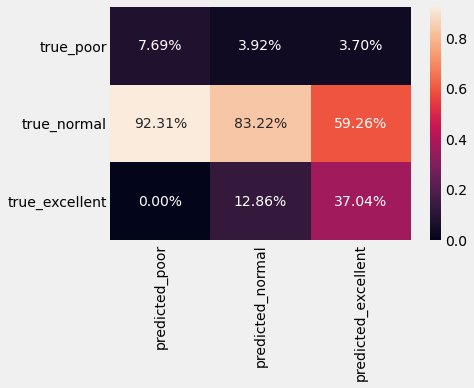

In [105]:
import seaborn as sns
sns.heatmap(cm/np.sum(cm),annot=True,fmt='.2%')

In [106]:
X=X.loc[:,first_set_important_features]

In [107]:
f1=make_scorer(f1_score,average='weighted')
grid_params={
    'kernel':['linear','poly','rbf'],
    'C':[0.1,1,10,100,1000],
    'gamma':[0.0001,0.001,0.01,0.1,1],
    }
svmclf=GridSearchCV(SVC(),param_grid=grid_params,cv=10,return_train_score=False,scoring=f1)
svmclf.fit(X,y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring=make_scorer(f1_score, average=weighted))

In [108]:
svmclf.best_params_

{'C': 0.1, 'gamma': 0.0001, 'kernel': 'linear'}

In [109]:
clf=SVC(C=svmclf.best_params_['C'],gamma=svmclf.best_params_['gamma'],kernel=svmclf.best_params_['kernel'])

In [110]:
y_pred=cross_val_predict(clf,X,y,cv=10)
print('f1_score: '+str(round(f1_score(y,y_pred,average='weighted'),4)))

f1_score: 0.7457


In [111]:
cm=pd.DataFrame(confusion_matrix(y,y_pred),columns=['predicted_poor','predicted_normal','predicted_excellent'],index=['true_poor','true_normal','true_excellent'])
cm

,predicted_poor,predicted_normal,predicted_excellent
true_poor,0,63,0
true_normal,0,1319,0
true_excellent,0,217,0


<AxesSubplot:>

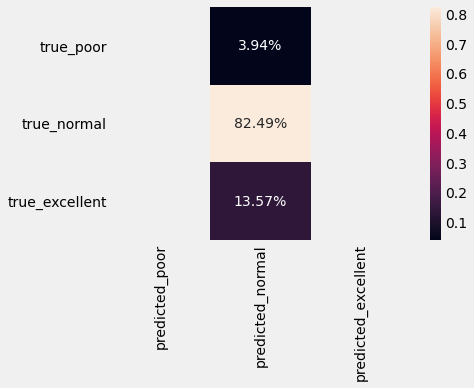

In [112]:
import seaborn as sns
sns.heatmap(cm/np.sum(cm),annot=True,fmt='.2%')